In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import time
import copy
import math
from sklearn.decomposition import PCA
import itertools

In [3]:
n_samples = 1500
# circles(2 clusters)
noisy_circles = datasets.make_circles(n_samples =n_samples, factor =0.6, noise =0.05)
# moons(2 clusters)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
# Gaussian blobs
blobs = datasets.make_blobs(n_samples=[500,900,100], random_state =7, cluster_std =[0.5,2.5,1])
# Anisotropicly distributed data
random_state = 1
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.5, -0.6], [-0.4, 0.7]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
#skewed norm


In [93]:
#f distributed clusters
a1 = [60,10,50]
a2 = [30,10,25]
a3 = [60,30,10]
a4 = [30,30,70]

r1 = np.append(np.random.f(a1[0], a3[0], size=500)+1,np.random.f(a1[1],a3[1], size=500)-2)
r3 = np.append(r1,np.random.f(a1[2],a3[2], size=500))
r2 = np.append(np.random.f(a2[0],a4[0], size=500)+1,np.random.f(a2[1],a4[1], size=500)+1)
r4 = np.append(r2,np.random.f(a2[2],a4[2], size=500))
X = (r3,r4)
y_shape = np.zeros(1500)
y_shape[501:1000]=1
y_shape[1001:1500]=2
f = (X, y_shape)


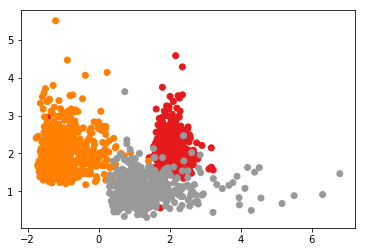

In [94]:
plt.scatter(f[0][0],f[0][1],c=f[1], cmap='Set1' )

In [95]:
#beta distributed clusters 
a1 = [8,20,12]
a2 = [8,15,12]
a3 = [20,2,6]
a4 = [20,1,6]

r1 = np.append(np.random.beta(a1[0], a3[0], size=500),np.random.beta(a1[1],a3[1], size=500))
r3 = np.append(r1,np.random.beta(a1[2],a3[2], size=500))
r2 = np.append(np.random.beta(a2[0],a4[0], size=500),np.random.beta(a2[1],a4[1], size=500))
r4 = np.append(r2,np.random.beta(a2[2],a4[2], size=500))
X = np.array((r3,r4)).T
y_shape = np.zeros(1500)
y_shape[501:1000]=1
y_shape[1001:1500]=2
beta = (X, y_shape)


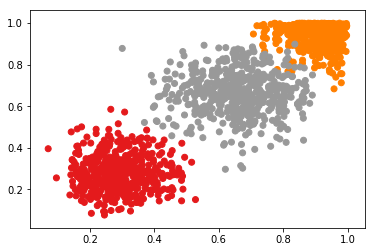

In [96]:
plt.scatter(beta[0][:,0],beta[0][:,1],c=f[1], cmap='Set1' )

In [97]:
#skewed normal distribution
from scipy.stats import skewnorm
a1 = [1,1,2]
a2 = [2,1,2]

r1 = np.append(skewnorm.rvs(a1[0], size=500)+2,skewnorm.rvs(a1[1], size=500)-2)
r3 = np.append(r1,skewnorm.rvs(a1[2], size=500))
r2 = np.append(skewnorm.rvs(a2[0], size=500)+1,skewnorm.rvs(a2[1], size=500)-3)
r4 = np.append(r2,skewnorm.rvs(a2[2], size=500))
X = (r3,r4)
y_shape = np.zeros(1500)
y_shape[501:1000]=1
y_shape[1001:1500]=2
skewnorm = (X, y_shape)

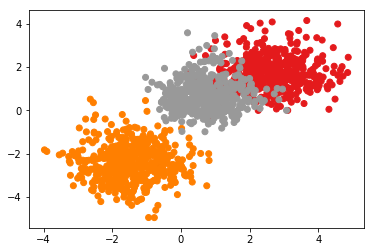

In [98]:
plt.scatter(skewnorm[0][0],skewnorm[0][1],c=skewnorm[1], cmap='Set1' )

In [156]:
#Asymetric normal distributed clusters
plt.rcParams['figure.figsize'] = (16,8)

mean = [[3,2], [10,13], [9,4]]
cov1 = [[2, 0], [0, 2]]
cov2 = [[5, 0], [0, 2]]
cov3 = [[3, 0], [0, 1]]
taus = [[0.7, 0.3],[0.23, 0.68],[0.4, 0.5]]

def co_fun(tau,s):
    num_lef =  2*math.sqrt(tau)
    num_rig =  2*math.sqrt(1-tau)
    deno = math.sqrt(tau) + math.sqrt(1-tau)
    s_co = copy.deepcopy(s)
    for i in range(len(s)):
        if s[i]< 0:
            s_co[i] = num_lef/deno * (1/math.sqrt(1-tau)) * s[i]
        else:
            s_co[i] = num_rig/deno * (1/math.sqrt(tau)) * s[i]
            i = i+1
    return s_co

def agd_random(scale,location,tau):
    x, y = np.random.multivariate_normal([0, 0], scale, 500).T
    sample = np.array((x,y)).T
    x_co = co_fun(tau[0],x) + location[0]
    y_co = co_fun(tau[1],y) + location[1]
    #zero = np.zeros(x_co.shape)
    sample_co = np.array((x_co,y_co)).T
    return sample_co


s1 = np.array(agd_random(cov1, mean[0], taus[0]))
s2 = np.array(agd_random(cov2, mean[1], taus[1]))
s3 = np.array(agd_random(cov3, mean[2], taus[2]))
s12 = np.append(s1,s2,axis = 0)
X = np.append(s12,s3,axis = 0)
y_shape = np.zeros(1500)
y_shape[501:1000]=1
y_shape[1001:1500]=2
AGD = (X, y_shape)

#expectile_fun(s3,taus)


In [100]:
#Euclidean distance
def dist(a, b):
    return np.linalg.norm(a - b, None)

In [101]:
#Tau-distance
def dist_fun(a,m,tau):
    dist = np.zeros(len(m))
    for i in range(len(m)):
        d = a - m[i]
        ele = 0
        for j in range(len(d)):
            col = d[j]
            ad = (1-tau[j])* sum(col[col<0]**2) + tau[j]* sum(col[col>=0]**2)
            ele = ele + ad
        dist[i] = ele
    return dist

In [102]:
#Expectile estimation
def expectile_fun(group, tau):
    e = np.mean(group, axis=0)
    e_new = np.zeros(e.shape)
    while dist(e_new , e) != 0:
        c = group[:,:]- e
        e = copy.deepcopy(e_new)
        for i in range(len(c[0])):
            d = c[:,i]
            a_co = group[:,i]
            neg = a_co[d<0]
            pos = a_co[d>=0]
            norm = tau[i]*len(pos)+ (1-tau[i])*len(neg)
            e_new[i] = (tau[i]* sum(pos) + (1-tau[i])* sum(neg))/norm
    return  e_new

In [103]:
#Estimate optimal taus
def tau_fun(points, mu):
    tau_list = []
    dis = points - mu
    for i in range(len(mu)):
        res = dis[:,i]
        e_neg = -sum(res[res < 0])/len(res[res < 0])
        e_pos = sum(res[res >= 0])/len(res[res >= 0])
        c = e_neg/e_pos
        tau = c/(1+c)
        tau_list.append(tau)
    return tau_list

In [167]:
# Define K expectile clustering 
def k_expectile_new(X, k): 
    X = np.array(X)
# Initialize cluster centers as K means cluster centers
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    C = kmeans.cluster_centers_

# To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    clusters = np.zeros(len(X))
# Initialize tau = 0.5
    tau = np.ones(np.shape(X)[1])*0.1
# Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old)
# Loop will run till the error 
    while error >= 0.01:
    # Assigning each value to its closest cluster
        for i in range(len(X)):
            for j in range (len(C[0])):
                distances = dist_fun(X[i], C, tau)
                cluster = np.argmin(distances)
                clusters[i] = cluster
    # Storing the old centroid values
        C_old = copy.deepcopy(C)
    # Finding the new centroids
        for d in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == d]
            points = np.array(points)
    # Updating taus
            tau = tau_fun(points,C[d])
            print(tau)
            C[d] = expectile_fun(points,tau) 
        error = dist(C, C_old)
        #print(error)
    return C, clusters

In [117]:
X = blobs[0]
y = blobs[1]
tau1 = [0.05,0.05]
tau2 = [0.5,0.5]
#C1, clusters1 = k_expectile(X, 3, tau1)
#C2, clusters2 = k_expectile(X, 3, tau2)
C1, clusters1 = k_expectile_new(X, 3)

0.4061770199470882
0.2965565804952903
0.1960050902422086
0.27639311629957364
0.41907096961897716
0.5094153603206678
0.5861227357106635
0.4646402310081058
0.31126027567719833
0.15849039669431442
0.122691125508575
0.3384001409276021
0.5481504449120483
0.3461035164026146
0.13107058880518127
0.17100193413633905
0.27915698243816106
0.3088102453024494
0.2742880935703185
0.14470946219480427
0.05575422217314876
0.21350172193702974
0.2449622403272398
0.21939840877670383
0.0683763564950843
0.06264786629835488
0.14866554935346082
0.12373065796447869
0.09729414481788756
0.0433463984809523
0.03163384118305696
0.07353813956472156
0.07387852299625206
0.0588152262325498
0.01663189168868685
0.0327336985415376
0.01728492294447181
0.032579071929551257
0.02839036735685625
0.017604433982759047
0.016511622329732356
0.01796694831738347
0.01792569521962754
0.017873109972537864
0.017820380020925595
0.017767518550766925
0.010500608932325428
0.01610300047504631
0.016160361000343876
0.01621755757759633
0.01654580

In [139]:
X = noisy_circles[0]
y = noisy_circles[1]
tau1 = [0.05,0.05]
tau2 = [0.5,0.5]
C1, clusters1 = k_expectile(X, 2, tau1)
C2, clusters2 = k_expectile(X, 2, tau2)

In [140]:
X = noisy_moons[0]
y = noisy_moons[1]
xtau1 = [0.05,0.05]
tau2 = [0.5,0.5]
C1, clusters1 = k_expectile(X, 2, tau1)
C2, clusters2 = k_expectile(X, 2, tau2)

In [141]:
X =aniso[0]
y =aniso[1]
tau1 = [0.05,0.05]
tau2 = [0.5,0.5]
C1, clusters1 = k_expectile(X, 3, tau1)
C2, clusters2 = k_expectile(X, 3, tau2)

In [142]:
X =beta[0]
y =beta[1]
tau1 = [0.3,0.4]
tau2 = [0.5,0.5]
#C1, clusters1 = k_expectile(X, 3, tau1)
#C2, clusters2 = k_expectile(X, 3, tau2)
C1, clusters1 = k_expectile_new(X, 3)

[0.37472444922454673, 0.36134007947894536]
[0.4336610645652364, 0.5256649309708155]
[0.3430860645809234, 0.34948997719725144]
[0.5394407129243326, 0.5065549776266709]
[0.5599403124350317, 0.649613424766172]
[0.44820641134877287, 0.47143602727915296]
[0.5440662221857135, 0.5163824120612699]
[0.5841602062509237, 0.6931382748321436]
[0.44734910582954035, 0.4836071604544878]
[0.5355267772847263, 0.5156880694950017]
[0.5913367024531461, 0.705705289411934]
[0.44319379994770197, 0.47996140946649996]


In [168]:
k=3
X = AGD[0]
y = AGD[1]
#tau1 = [0.3,0.7]

C1, clusters1 = k_expectile_new(X, k)

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
C2 = kmeans.cluster_centers_
clusters2 = kmeans.labels_

[0.2889671209130883, 0.42024018886405134]
[0.2964999408667295, 0.2181556371089962]
[0.47764105681629687, 0.36556139608179883]
[0.3599170881871447, 0.622147560316971]
[0.41207240589081867, 0.46040578054679965]
[0.6437768916949407, 0.42082742933397194]
[0.30741425472809647, 0.6431501100220994]
[0.445175202330674, 0.46950763992223893]
[0.6888089146143418, 0.39072856785474047]
[0.28141109920752805, 0.6452237067062246]
[0.44217002090278784, 0.4509455980253814]
[0.7071471209852885, 0.3671921907449093]
[0.26509173810144465, 0.6369862226953724]
[0.43419451452159924, 0.43906944747371346]
[0.7136956888657217, 0.34761111291354224]
[0.25359713285577884, 0.6370867383991325]
[0.4245663413496684, 0.4333305837339936]
[0.7169227839465403, 0.3230909863175431]
[0.24595985240360194, 0.6306805532162724]
[0.41310874176332074, 0.42760811809578975]
[0.7160987545081441, 0.32043500254381335]
[0.2418342253676285, 0.6338015564187707]
[0.4098933431732632, 0.42475912167049523]
[0.7151347676218259, 0.326231258654723

In [30]:
k=3
X = AGD[0]
y = AGD[1]
C1, clusters1 = k_expectile_new(X, 3)


[0.5784313725490184, 0.4215686274509788]
[0.5959999999999998, 0.40600000000000147]
[0.6020408163265297, 0.40612244897959193]
[0.6292262309961422, 0.37633553080245297]
[0.646952787008589, 0.34571276795200306]
[0.6499388004895962, 0.34650371840978916]
[0.6633357370969403, 0.3544995994892473]
[0.6774072013646617, 0.31039338863137217]
[0.6755028365136679, 0.3086808795948121]
[0.6754875510614297, 0.34203596663315383]
[0.6929426830225067, 0.2836442657664988]
[0.6790713665908094, 0.2898423405264504]
[0.6772044359829372, 0.33152364683423563]
[0.692942683022506, 0.27879289199697077]
[0.6808478182971973, 0.2864932804849012]
[0.6772044359829376, 0.3246075520890387]
[0.6929426830225051, 0.2852729189857357]
[0.6790713665908089, 0.2881648868515418]
[0.6772044359829379, 0.3228904045243243]
[0.6929426830225043, 0.28040459292410846]
[0.6808478182971973, 0.2881648868515407]
[0.6772044359829381, 0.3211780209037743]
[0.6929426830225037, 0.282021656579651]
[0.6790713665908089, 0.2881648868515397]
[0.677204

In [128]:
k=3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
C2 = kmeans.cluster_centers_
clusters2 = kmeans.labels_

In [158]:
#matching cluster index
import itertools
def cluster_index(clusters, target, k):
    list_p = list(range(1,k+1,1))
    permu = list(itertools.permutations(list_p,k))
    new = np.zeros(clusters.shape)
    acc = np.zeros(len(permu))
    for i in range(len(permu)):
        for j in range(k):
            new[np.where(clusters == j)] = permu[i][j]-1
        acc[i] = np.sum(new == target)/len(target)
    index = permu[np.argmax(acc)]
    #print(index)
    return index, np.max(acc)

In [169]:
k = 3
index1,acc1 = cluster_index(clusters1,y,k)
index2,acc2 = cluster_index(clusters2,y,k)
new1 = np.zeros(len(clusters1))
new2 = np.zeros(len(clusters2))
for j in range(k):
    new1[np.where(clusters1 == j)] = index1[j]
for j in range(k):
    new2[np.where(clusters2 == j)] = index2[j]

(0.9346666666666666, 0.9513333333333334)

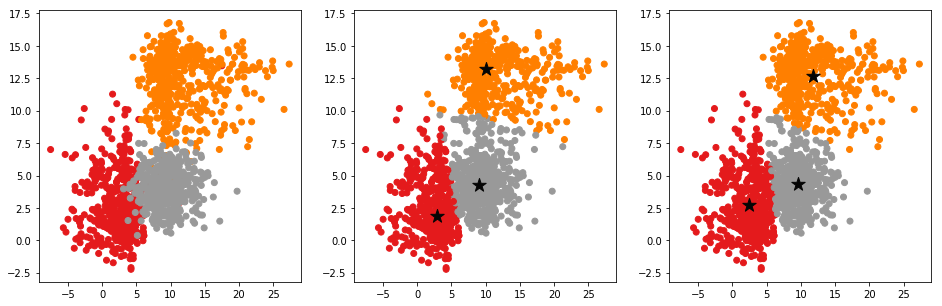

In [170]:
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(131)
y = AGD[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='Set1')
#plt.xlabel('PC1', fontsize=18)
#plt.ylabel('PC2', fontsize=18)


plt.subplot(132)
y1 = new1
plt.scatter(X[:,0], X[:,1], c=y1, cmap='Set1')
plt.scatter(C1[:, 0], C1[:, 1],marker='*', s=200, c='#050505')


plt.subplot(133)
y2 = new2
plt.scatter(X[:,0], X[:,1], c=y2, cmap='Set1')
plt.scatter(C2[:, 0], C2[:, 1],marker='*', s=200, c='#050505')
plt.savefig('AGD2.png', transparent=True)
acc1,acc2

In [24]:
def expectile_fun_show(group, tau):
    e = np.mean(group, axis=0)
    e_new = np.zeros(e.shape)
    while dist(e_new , e) !=0:
        c = group - e
        e = copy.deepcopy(e_new)
        d = c
        a_co = group
        neg = a_co[d<0]
        pos = a_co[d>=0]
        norm = tau*len(pos)+ (1-tau)*len(neg)
        e_new = (tau* sum(pos) + (1-tau)* sum(neg))/norm
        print(e_new)
    return  (e_new)


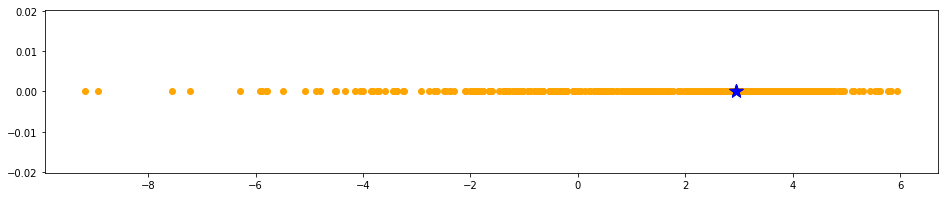

In [26]:
plt.rcParams['figure.figsize'] = (16, 3)
data = s1[:,0]
Y = np.zeros(len(data))
#plt.xlim(-2.7,15)
plt.scatter(data, Y, c = 'orange')
plt.scatter(2.9445652610826443, 0,marker='*', s=200, c='#050505')
plt.scatter(2.9445652610826443, 0,marker='*', s=200, c='blue')
plt.savefig('LAWS4.png', transparent=True)

1.0488

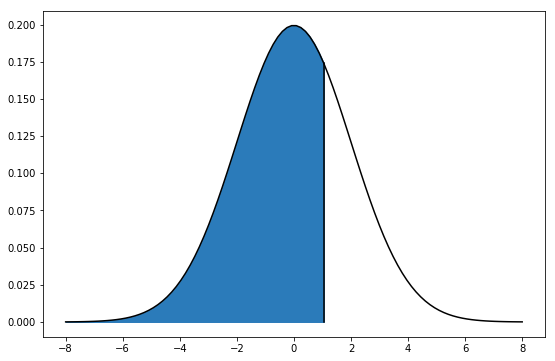

In [3]:
plt.rcParams['figure.figsize'] = (9,6)

from scipy.stats import norm

x = np.linspace(-8, 8, 100)
y = norm.pdf(x,0,2)

plt.plot(x,y, color='black')


#q1 = np.quantile(x, 0.7, axis=0)
q1 = 0.5244*2
plt.plot([q1 ,q1 ],[0.0, norm.pdf(q1 ,0, 2)], color='black')

ptx = np.linspace(-8, q1, 100)
pty = norm.pdf(ptx,0,2)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')
plt.savefig('quantile.png', transparent=True)
q1

0.66

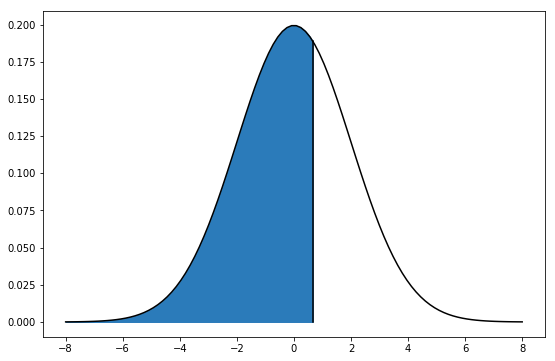

In [4]:
x = np.linspace(-8, 8, 100)
y = norm.pdf(x,0,2)

plt.plot(x,y, color='black')

#data = np.array((x,y)).T
#data = np.random.normal(loc=0.0, scale=2.0, size=10000)
q2 = 0.66
plt.plot([q2,q2],[0.0, norm.pdf(q2 ,0, 2)], color='black')

ptx = np.linspace(-8, q2, 100)
pty = norm.pdf(ptx,0,2)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')
plt.savefig('expectile.png', transparent=True)

In [22]:
x = np.random.normal(loc=0.0, scale=2.0, size=10000)
y = np.random.normal(loc=0.0, scale=2.0, size=10000)
data = np.array((x,y)).T
q2 = expectile_fun(data, [0.7,0.7])

In [23]:
q2

array([0.68800196, 0.67814578])